## Laila Fitria - Machine Learning

### Problem Statement

This data-set contains transaction data in a supermarket. You as a data scientist at the retail company are expected to be able to process the data that has been collected so that it becomes valuable insight. Please answer the question below and explore your creativity. 

Some goals of this project:
1.	What items customers buy the most and are there any items we should ignore?
2.	What is our strategy to increase sales based on our export destination countries?
3.	Do customer segmentation appropriately. Please explain in detail and completely
4.	Get the hidden insight from the data

### Lets Start

### A. Data Prepocessing

In [1]:
# library
import copy
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv('ML_2_Fellow.csv', header= 0,
                        encoding= 'unicode_escape')
df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### a.1 -- Parsing data

*This data is not clean, because it have unicode character. so I gave the option "encoding = 'unicode_escape' " on pd.read_csv*

In [3]:
# lets check missing value

def check_missing(df):
    percent=df.isnull().sum()/df.shape[0]*100
    freq=df.isnull().sum()
    types=df.dtypes
    df_miss=pd.DataFrame({'percentage':percent, 'frequency':freq, 'var_type':types})
    df_miss.sort_values(by='frequency',ascending= False, inplace=True)
    return df_miss[df_miss['percentage']>0]

check_missing(df)

,percentage,frequency,var_type
Kode_Pelanggan,25.599686,138727,float64
Barang,1.381966,7489,object
Kode_Barang,1.113656,6035,object
Jumlah,1.113656,6035,float64
Tanggal_Transaksi,1.113656,6035,object
Harga_Satuan,1.113656,6035,float64
Negara,1.113656,6035,object


In [4]:
# lets check which rows contains missing value
df[df.isnull().any(axis=1)]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,536414,22139,NaN,56.0,12/1/2010 11:52,0.00,NaN,United Kingdom
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1.0,12/9/2011 10:26,1714.17,NaN,United Kingdom
541549,"581501,22165,""DIAMANTE HEART SHAPED WALL MIRRO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541614,"581516,21111,""SWISS ROLL TOWEL, CHOCOLATE SPO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
541649,"581538,85071C,""CHARLIE+LOLA""""EXTREMELY BUSY"""" ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


*As you can see, there are so many rows that it supposed to be in all columns, but just filled in "Kode_Bayar". So we need to parse them and fill to exact column*

In [5]:
# first step is filter Kode_Bayar that contains ","
df2 = copy.deepcopy(df[df['Kode_Bayar'].str.contains(",")])

In [6]:
# parse Kode_Bayar and fill the value to appropriate columns
df2['Kode_Barang'] = df2["Kode_Bayar"].apply(lambda x: x.split(",")[1])
df2['Barang'] = df2["Kode_Bayar"].apply(lambda x: re.findall('"([^"]*)"', x)[0])
df2['Negara'] = df2["Kode_Bayar"].apply(lambda x: x.split(",")[-1])
df2['Kode_Pelanggan'] = df2["Kode_Bayar"].apply(lambda x: x.split(",")[-2])
df2['Harga_Satuan'] = df2["Kode_Bayar"].apply(lambda x: x.split(",")[-3])
df2['Tanggal_Transaksi'] = df2["Kode_Bayar"].apply(lambda x: x.split(",")[-4])
df2['Jumlah'] = df2["Kode_Bayar"].apply(lambda x: x.split(",")[-5])
df2['Kode_Bayar'] = df2["Kode_Bayar"].apply(lambda x: x.split(",")[0])
df2.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
109,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,12/1/2010 9:41,2.1,15311,United Kingdom
253,536394,21506,"FANCY FONT BIRTHDAY CARD,",24,12/1/2010 10:39,0.42,13408,United Kingdom
871,536477,22041,RECORD FRAME 7,48,12/1/2010 12:27,2.1,16210,United Kingdom
956,536520,22760,"TRAY, BREAKFAST IN BED",1,12/1/2010 12:43,12.75,14729,United Kingdom
1014,536520,21111,"SWISS ROLL TOWEL, CHOCOLATE SPOTS",1,12/1/2010 12:43,2.95,14729,United Kingdom


In [7]:
# filter df without df2 index and then save to new_df
new_df = df.loc[~df.index.isin(df2.index.tolist())]

In [8]:
# append df2 and new_df to then we get the entire of cleaned data
print('size of original data : ',df.shape)
print('size of data contains "," : ',df2.shape )
print('size of data not contains "," : ',new_df.shape)
new_df = new_df.append(df2)
new_df[new_df.isnull().any(axis=1)]
print('size of cleaned data : ', new_df.shape)

size of original data :  (541909, 8)
size of data contains "," :  (6035, 8)
size of data not contains "," :  (535874, 8)
size of cleaned data :  (541909, 8)


#### a.2 -- Data Type Correction

In [9]:
df.Tanggal_Transaksi.unique

<bound method Series.unique of 0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: Tanggal_Transaksi, Length: 541909, dtype: object>

In [10]:
print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541787
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Kode_Bayar         541909 non-null  object
 1   Kode_Barang        541909 non-null  object
 2   Barang             540455 non-null  object
 3   Jumlah             541909 non-null  object
 4   Tanggal_Transaksi  541909 non-null  object
 5   Harga_Satuan       541909 non-null  object
 6   Kode_Pelanggan     409217 non-null  object
 7   Negara             541909 non-null  object
dtypes: object(8)
memory usage: 37.2+ MB
None


,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


*Column : Jumlah, Tanggal_Transaksi, Harga_Satuan need to be changed as appropriate type*

In [11]:
# change data type
new_df['Jumlah'] = new_df['Jumlah'].astype(float)
new_df['Harga_Satuan'] = new_df['Harga_Satuan'].astype(float)
new_df['Tanggal_Transaksi'] = pd.to_datetime(new_df['Tanggal_Transaksi'])
print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541787
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Kode_Bayar         541909 non-null  object        
 1   Kode_Barang        541909 non-null  object        
 2   Barang             540455 non-null  object        
 3   Jumlah             541909 non-null  float64       
 4   Tanggal_Transaksi  541909 non-null  datetime64[ns]
 5   Harga_Satuan       541909 non-null  float64       
 6   Kode_Pelanggan     409217 non-null  object        
 7   Negara             541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 37.2+ MB
None


,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom


#### a.3 -- Missing Value Imputation

In [12]:
check_missing(new_df)

,percentage,frequency,var_type
Kode_Pelanggan,24.486030,132692,object
Barang,0.268311,1454,object


*Kode_Pelanggan, and Barang are object so we can replace missing value with "Others". We can't delete that data because maybe those data have hidden insight*

In [13]:
new_df.fillna('Others', inplace=True)
check_missing(new_df)

,percentage,frequency,var_type


*For now, there is no missing value anymore*

#### a.4 -- Extract year, month, day, hour and minute from tanggal transaksi

In [14]:
new_df['year'] = new_df['Tanggal_Transaksi'].dt.year
new_df['month'] = new_df['Tanggal_Transaksi'].dt.month
new_df['day'] = new_df['Tanggal_Transaksi'].dt.day
new_df['hour'] = new_df['Tanggal_Transaksi'].dt.hour
new_df['minute'] = new_df['Tanggal_Transaksi'].dt.minute
new_df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,year,month,day,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26


*Those columns will use as additional feature when doing customer segmentation*

### B. Answer the Questions

#### No.1.a : What items customers buy the most ?

In [15]:
print('Total Barang : ',new_df.Barang.nunique())

Total Barang :  4197


<AxesSubplot:>

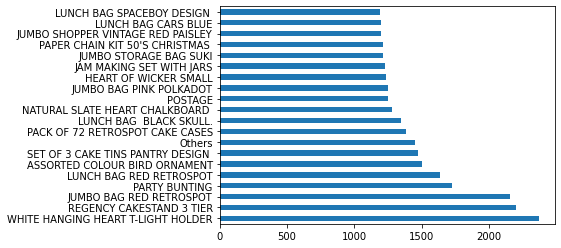

In [16]:
# here is the top 20 popular items that customer buy
temp = new_df.Barang.value_counts()
temp2 = temp.head(20)
temp2.plot(kind='barh')

In [17]:
new_df.Barang.value_counts(normalize=True).head()

WHITE HANGING HEART T-LIGHT HOLDER    0.004372
REGENCY CAKESTAND 3 TIER              0.004060
JUMBO BAG RED RETROSPOT               0.003984
PARTY BUNTING                         0.003187
LUNCH BAG RED RETROSPOT               0.003023
Name: Barang, dtype: float64

*From the plot above, we can see that The most popular item are* 
1. White Hanging Heart T-light Holder
2. Regency cakestand 3 tier
3. Jumbo bag red retrospot

*Actually, this plot has an exponential pattern, which means it has a small difference in buying. So its hard to say the most item bought by customer, depend on our subjectivity*

*You can see the plot below is for top 100 product*

<AxesSubplot:>

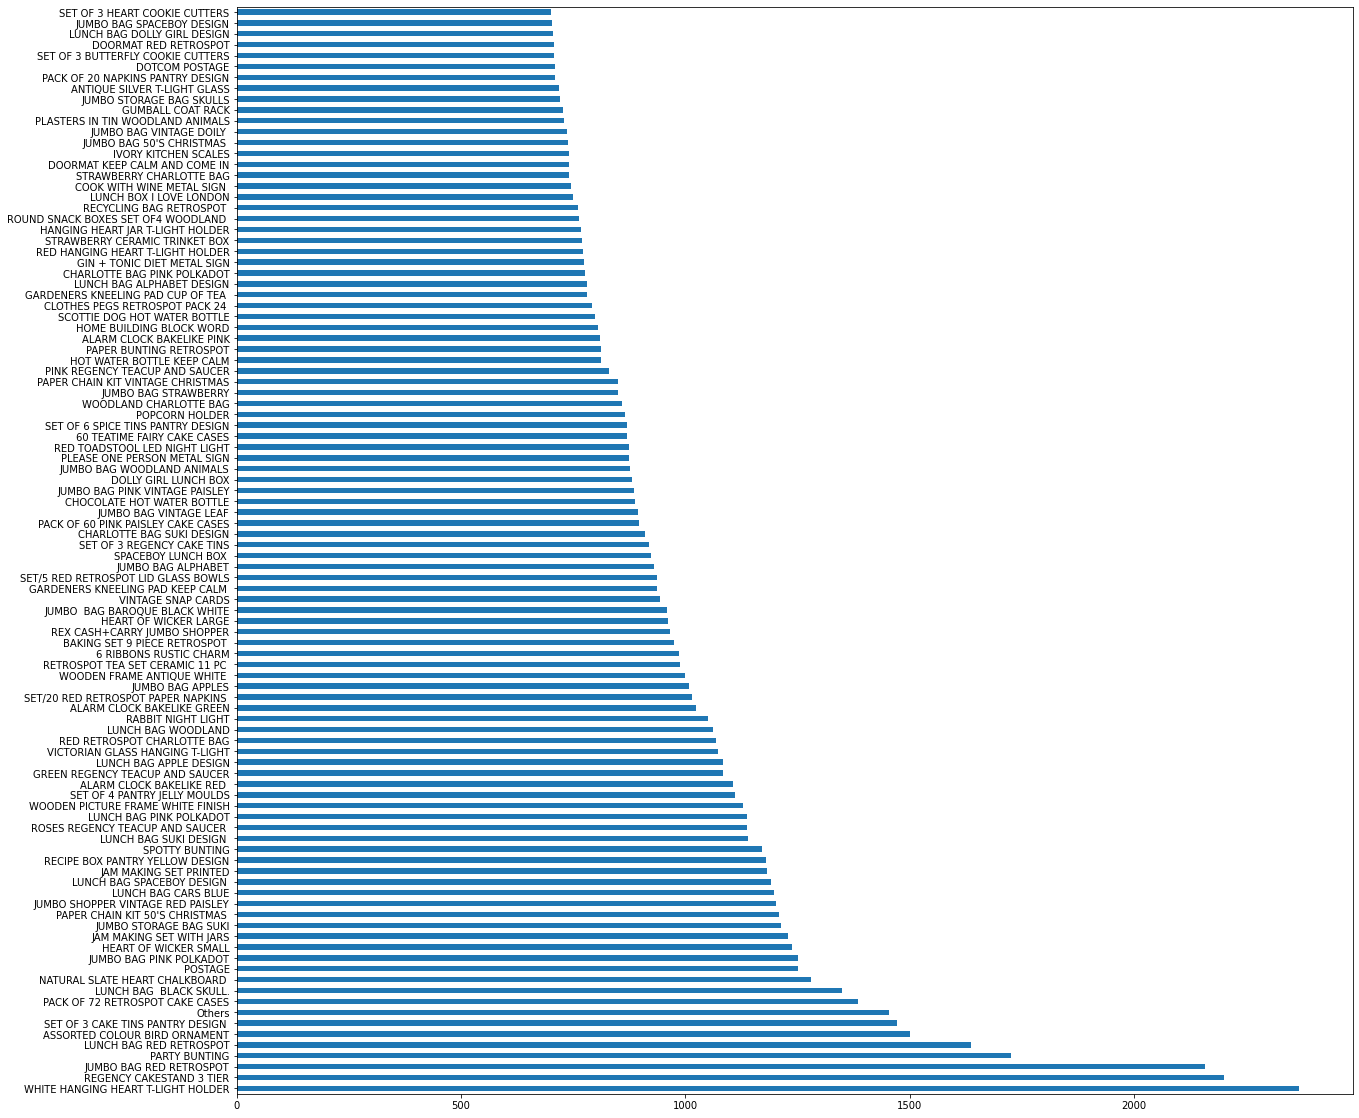

In [18]:
plt.figure(figsize = (20, 20))
temp = new_df.Barang.value_counts()
temp2 = temp.head(100)
temp2.plot(kind='barh')

#### No.1.b : Are there any items we should ignore ?

In [19]:
# lets check the item that rarely buy using count and its frequency
df_freq = new_df.Barang.value_counts().rename_axis('Barang').reset_index(name='counts')
df_freq['buying_percentage'] = df_freq.counts/new_df.shape[0]*100
df_freq.head()

,Barang,counts,buying_percentage
0,WHITE HANGING HEART T-LIGHT HOLDER,2369,0.437158
1,REGENCY CAKESTAND 3 TIER,2200,0.405972
2,JUMBO BAG RED RETROSPOT,2159,0.398406
3,PARTY BUNTING,1727,0.318688
4,LUNCH BAG RED RETROSPOT,1638,0.302265


*We can do quantile discretizer to grouping whether the product is fast moving or slow moving*

In [20]:
df_freq['category'] = pd.qcut(df_freq['counts'], 4)
df_freq['category_label'] = pd.qcut(df_freq['counts'], 4, labels=False)
df_freq

,Barang,counts,buying_percentage,category,category_label
0,WHITE HANGING HEART T-LIGHT HOLDER,2369,0.437158,"(163.0, 2369.0]",3
1,REGENCY CAKESTAND 3 TIER,2200,0.405972,"(163.0, 2369.0]",3
2,JUMBO BAG RED RETROSPOT,2159,0.398406,"(163.0, 2369.0]",3
3,PARTY BUNTING,1727,0.318688,"(163.0, 2369.0]",3
4,LUNCH BAG RED RETROSPOT,1638,0.302265,"(163.0, 2369.0]",3
...,...,...,...,...,...
4192,WOOLLY HAT SOCK GLOVE ADVENT STRING,1,0.000185,"(0.999, 11.0]",0
4193,MUMMY MOUSE RED GINGHAM RIBBON,1,0.000185,"(0.999, 11.0]",0
4194,ASSORTED COLOUR SILK GLASSES CASE,1,0.000185,"(0.999, 11.0]",0
4195,"WALL ART,ONLY ONE PERSON",1,0.000185,"(0.999, 11.0]",0


In [21]:
print('range : ',df_freq.category.unique())

range :  [(163.0, 2369.0], (58.0, 163.0], (11.0, 58.0], (0.999, 11.0]]
Categories (4, interval[float64]): [(0.999, 11.0] < (11.0, 58.0] < (58.0, 163.0] < (163.0, 2369.0]]


From the categorization using this quantile discretizer, 4 categories were obtained based on the purchase:
1. (163.0, 2369.0] : category 3
2. (58.0, 163.0] : category 2
3. (11.0, 58.0] : category 1
4. (0.999, 11.0] : category 0 >> below 25% of data tendecy

The higher the category, the more frequently the product is purchased. We can assume that products with category 0 can be ignored. while for category 1 we need to do further analysis with the product team to see the potential of this product in the future.

#### No.2 : What is our strategy to increase sales based on our export destination countries?

In [22]:
# lets add the total sales per transaction
new_df['total_sales'] = new_df['Jumlah']*new_df['Harga_Satuan']
new_df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,year,month,day,hour,minute,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,20.34


*Lets see the export value rating by country*

<AxesSubplot:xlabel='total_sales', ylabel='Negara'>

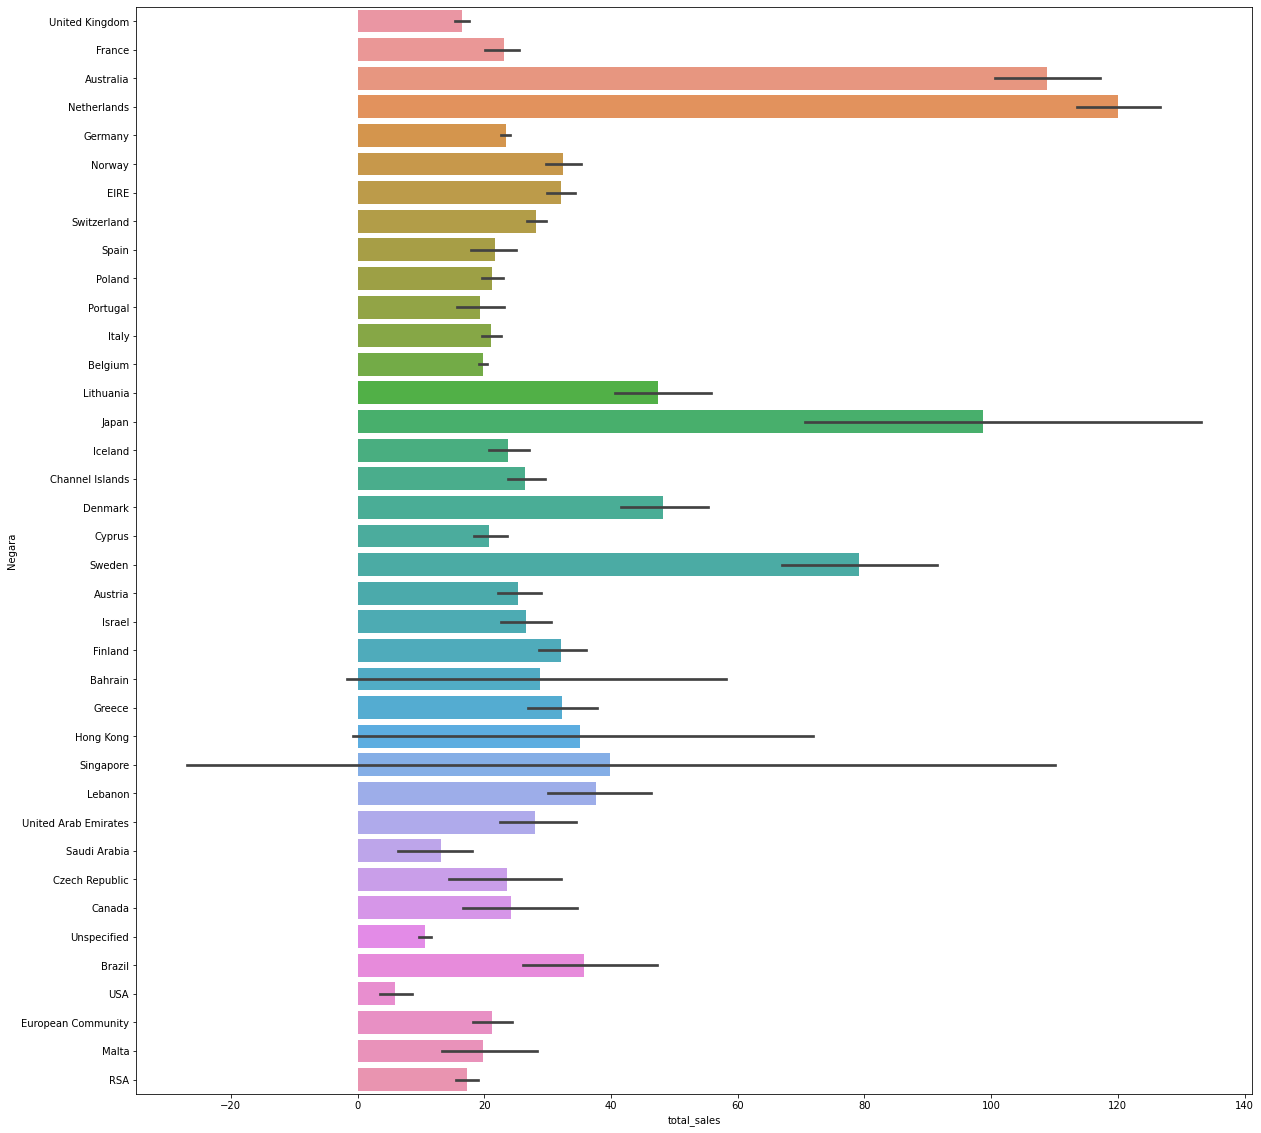

In [23]:
plt.figure(figsize = (20, 20))
sns.barplot(y='Negara',x='total_sales',data=new_df)

It can be seen that the countries that have a high purchase rating are
* Australia
* Netherlands
* Japan
* Sweden
* the rest have a fairly low purchase rating or export value

*Lets take example of country that has low export value, such as "USA"*

In [24]:
df_usa = new_df[new_df.Negara=='USA']

*Lets see what Item most buy at USA*

In [25]:
# Here is the top 10 product bought at USA
df_usa.groupby(['Barang']).agg('sum').reset_index().sort_values(by='total_sales', ascending=False).head(10)

,Barang,Jumlah,Harga_Satuan,year,month,day,hour,minute,total_sales
116,SET 6 SCHOOL MILK BOTTLES IN CRATE,48.0,6.78,4022,22,26,22,66,162.72
95,REGENCY CAKESTAND 3 TIER,9.0,25.50,4022,14,40,28,71,114.75
138,SET/10 RED POLKADOT PARTY CANDLES,48.0,3.75,6033,30,43,44,75,60.00
135,SET/10 BLUE POLKADOT PARTY CANDLES,48.0,3.75,6033,30,43,44,75,60.00
136,SET/10 IVORY POLKADOT PARTY CANDLES,48.0,3.75,6033,30,43,44,75,60.00
137,SET/10 PINK POLKADOT PARTY CANDLES,48.0,3.75,6033,30,43,44,75,60.00
110,SET 12 COLOURING PENCILS DOILY,88.0,1.30,4022,22,26,22,66,57.20
1,12 PENCILS SMALL TUBE RED RETROSPOT,72.0,0.65,2011,12,5,10,14,46.80
132,SET OF 6 TEA TIME BAKING CASES,32.0,1.25,2011,10,21,12,52,40.00
98,REGENCY TEAPOT ROSES,4.0,9.95,2011,10,21,12,52,39.80


In the USA, the most popular products to buy are children's school utensils, and mother's cooking utensils. To increase sales in the USA, we can do:
1. Promos for frequently purchased products
2. Mapping countries that have the same characteristics as the USA, but have a high purchasing rate. For later, cross selling or up selling will be carried out on other items that will be offered
3. We can get the mapping based on customer characteristic using customer segmentation

##### No.3 : Do customer segmentation appropriately. Please explain in detail and completely

In [26]:
# Lets see again the data
new_df.head(3)

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,year,month,day,hour,minute,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8,26,22.00


In this customer segmentation, we will do clustering technique using K-Means algorithm. So then, we need to use numerical data, because the K-Means algorithm is using euclidean distance.

Before we do clustering, we need to do a litle preparation such as :
1. Aggregating numerical column based on Kode_Pelanggan, to get the unique information per customer (Kode_Pelanggan), so then we can segment them to unique cluster
2. Columns :
    * Jumlah, Harga Satuan, and total_sales : we do sum agregation
    * Month, day, hour, and minute : we do mode aggregation
3. Standardization all the columns, because of K-Means calculate the distance so we need to do standardization to get same range values

In [27]:
# lets do the aggregation
df_agg = new_df.groupby(['Kode_Pelanggan']).agg({'Jumlah': "sum", 
                                        'Harga_Satuan': "sum",
                                        'total_sales': 'sum',
                                        'month':lambda x:x.value_counts().index[0], 
                                        'day':lambda x:x.value_counts().index[0], 
                                        'hour':lambda x:x.value_counts().index[0], 
                                        'minute':lambda x:x.value_counts().index[0]}).reset_index()

# add the column transaction frequency per customer
df_agg['transaction_frequency'] = new_df.groupby(['Kode_Pelanggan']).agg({'Kode_Pelanggan': "count"})['Kode_Pelanggan'].values.tolist()

# drop the customer_id
df_agg.drop(columns='Kode_Pelanggan', axis=1, inplace=True)
df_agg.head()

,Jumlah,Harga_Satuan,total_sales,month,day,hour,minute,transaction_frequency
0,0.0,2.08,0.00,1,18,10,1,2
1,2446.0,480.36,4299.80,10,7,14,25,181
2,2341.0,178.71,1797.24,12,16,19,9,31
3,631.0,605.10,1757.55,11,21,9,51,73
4,197.0,65.30,334.40,2,2,16,1,17


In [28]:
# do standardization to get same range of all columns
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_agg)
cluster_scaled

array([[-1.66196597e-01, -3.07849381e-02, -8.55364031e-02, ...,
        -1.14292602e+00, -1.72557204e+00, -5.34588442e-02],
       [ 2.68163794e-01,  1.95637419e-03,  1.23152140e-01, ...,
         6.00581896e-01, -3.20041360e-01,  4.62438484e-02],
       [ 2.49517906e-01, -1.86934896e-02,  1.69169991e-03, ...,
         2.77996680e+00, -1.25706181e+00, -3.73058940e-02],
       ...,
       [-1.56962444e-01, -3.04734616e-02, -8.35969654e-02, ...,
         6.00581896e-01,  1.61256332e+00, -5.17878493e-02],
       [-1.51990207e-01, -3.04036361e-02, -7.56353698e-02, ...,
        -7.07049045e-01, -2.02913803e-01, -5.29018459e-02],
       [ 5.04218723e+01,  7.41330519e+01,  6.95195156e+01, ...,
         1.03645888e+00,  6.16979093e-01,  7.38546433e+01]])

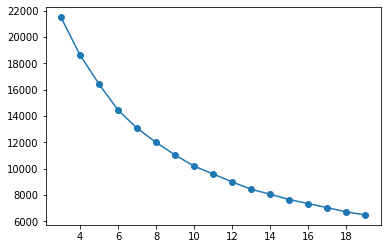

In [29]:
# lets try to find the best cluster using Elbow method
inertias =[]

for c in range(3,20):
    kmeans = KMeans(n_clusters=c, random_state=1234).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(range(3,20),inertias, marker='o')

From that plot, its preety hard to find the best cluster using elbow method, because there is no significant differences aboout the inertia (sum square distance).

Lets see the another methods : using silhouette score

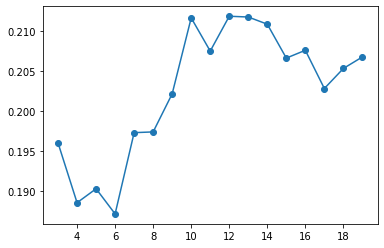

In [30]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(3,20)

inertias =[]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1234)
    preds = clusterer.fit_predict(cluster_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(cluster_scaled, preds)
    inertias.append(score)
    
plt.figure()
plt.plot(range_n_clusters,inertias, marker='o')

From the silhouette score, the number of clusters with the highest silhouette value statistically means that it is the best cluster.

From the plot above, the best cluster is 10 clusters.

Lets get the cluster prediction of df_agg using 10 cluster

In [31]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(cluster_scaled)
df_agg['clusters_predict'] = kmeans.predict(cluster_scaled)

df_agg.head()

,Jumlah,Harga_Satuan,total_sales,month,day,hour,minute,transaction_frequency,clusters_predict
0,0.0,2.08,0.00,1,18,10,1,2,6
1,2446.0,480.36,4299.80,10,7,14,25,181,2
2,2341.0,178.71,1797.24,12,16,19,9,31,2
3,631.0,605.10,1757.55,11,21,9,51,73,3
4,197.0,65.30,334.40,2,2,16,1,17,2


*Lets see the characteristics of all clusters*

In [32]:
# Calculate average values for each cluster level
df_agg.groupby('clusters_predict').agg('mean').round(1)

,Jumlah,Harga_Satuan,total_sales,month,day,hour,minute,transaction_frequency
clusters_predict,,,,,,,,
0,849.5,263.4,1452.1,10.2,9.1,11.0,16.8,76.1
1,284875.0,1083375.9,1434136.2,12.0,8.0,15.0,41.0,132692.0
2,581.1,319.1,1007.5,7.9,8.3,15.4,15.3,68.8
3,986.4,301.3,1543.4,9.4,23.0,10.8,44.3,90.0
4,76311.7,6073.1,135320.1,8.0,12.5,11.5,27.1,1442.0
5,673.5,221.5,1148.5,9.7,23.6,14.3,22.7,77.2
6,690.9,197.4,1162.7,3.7,21.1,12.0,13.6,56.2
7,823.0,271.4,1443.2,10.5,8.0,13.0,46.5,81.0
8,852.8,197.6,1383.0,3.7,8.2,10.8,36.9,61.3


From the table above, it can be seen that cluster 1 has the highest value than other clusters.

Cluster 4 ranks second.

The rest have relatively the same value. It is necessary to do further research to determine the best number of clusters from this data so that the sales strategy is more targeted.

#### No.4 : Get the hidden insight from the data

##### From this stage, I wanna do RFM analysis to get customer segment based on their transaction

1. Recency : How long customer didnt buy since last transaction
2. Frequency : How many transaction
3. Monetary : How much transaction amount

In [33]:
# check the data again
new_df.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara,year,month,day,hour,minute,total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,8,26,20.34


#### RECENCY

In [34]:
now = pd.Timestamp('now')

# group by customers and check last date of purshace
recency_df = new_df.groupby(by='Kode_Pelanggan', as_index=False)['Tanggal_Transaksi'].max()
recency_df.columns = ['Kode_Pelanggan','LastPurshaceDate']

# calculate recency
recency_df['LastPurshaceDate'] = pd.to_datetime(recency_df['LastPurshaceDate'])

recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

# drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,Kode_Pelanggan,Recency
0,12346,3816
1,12347,3493
2,12348,3566
3,12349,3509
4,12350,3801


#### FREQUENCY

In [35]:
# calculate frequency of purchases
frequency_df = new_df.groupby(by=['Kode_Pelanggan'], as_index=False)['Tanggal_Transaksi'].count()
frequency_df.columns = ['Kode_Pelanggan','Frequency']
frequency_df.head()

,Kode_Pelanggan,Frequency
0,12346,2
1,12347,181
2,12348,31
3,12349,73
4,12350,17


#### MONETARY

In [36]:
# create column total cost
monetary_df = new_df.groupby(by='Kode_Pelanggan',as_index=False).agg({'total_sales': 'sum'})
monetary_df.columns = ['Kode_Pelanggan','Monetary']
monetary_df.head()

,Kode_Pelanggan,Monetary
0,12346,0.00
1,12347,4299.80
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


#### CREATE RFM TABLE

In [37]:
# merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='Kode_Pelanggan')
temp_df.head()

,Kode_Pelanggan,Recency,Frequency
0,12346,3816,2
1,12347,3493,181
2,12348,3566,31
3,12349,3509,73
4,12350,3801,17


In [38]:
# merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='Kode_Pelanggan')
# use Kode_Pelanggan as index
rfm_df.set_index('Kode_Pelanggan',inplace=True)
# check the head
rfm_df.head()

,Recency,Frequency,Monetary
Kode_Pelanggan,,,
12346.0,3816,2,0.00
12347.0,3493,181,4299.80
12348.0,3566,31,1797.24
12349.0,3509,73,1757.55
12350.0,3801,17,334.40


##### RFM Quartiles

In [39]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,3510.0,6.0,114.205
0.50,3549.0,27.0,418.920
0.75,3662.0,79.0,1246.730


In [40]:
quantiles.to_dict()

{'Recency': {0.25: 3510.0, 0.5: 3549.0, 0.75: 3662.0},
 'Frequency': {0.25: 6.0, 0.5: 27.0, 0.75: 79.0},
 'Monetary': {0.25: 114.20500000000001, 0.5: 418.9200000000001, 0.75: 1246.73}}

##### Creation of RFM Segments

In [41]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [42]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [43]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
Kode_Pelanggan,,,,,,,
12346.0,3816,2,0.00,1,1,1,111
12347.0,3493,181,4299.80,4,4,4,444
12348.0,3566,31,1797.24,2,3,4,234
12349.0,3509,73,1757.55,4,3,4,434
12350.0,3801,17,334.40,1,2,2,122


* Best Recency score = 4: most recently purchase
* Best Frequency score = 4: most quantity purchase
* Best Monetary score = 4: spent the most

In [44]:
# Calculate RFM_Score
rfm_segmentation['RFM_Score_Sum'] = rfm_segmentation[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score_Sum
Kode_Pelanggan,,,,,,,,
12346.0,3816,2,0.00,1,1,1,111,3
12347.0,3493,181,4299.80,4,4,4,444,12
12348.0,3566,31,1797.24,2,3,4,234,9
12349.0,3509,73,1757.55,4,3,4,434,11
12350.0,3801,17,334.40,1,2,2,122,5


In [45]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score_Sum'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score_Sum'] >= 8) and (df['RFM_Score_Sum'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score_Sum'] >= 7) and (df['RFM_Score_Sum'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score_Sum'] >= 6) and (df['RFM_Score_Sum'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score_Sum'] >= 5) and (df['RFM_Score_Sum'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score_Sum'] >= 4) and (df['RFM_Score_Sum'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm_segmentation['RFM_Level'] = rfm_segmentation.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score_Sum,RFM_Level
Kode_Pelanggan,,,,,,,,,
12346.0,3816,2,0.00,1,1,1,111,3,Require Activation
12347.0,3493,181,4299.80,4,4,4,444,12,Can't Loose Them
12348.0,3566,31,1797.24,2,3,4,234,9,Can't Loose Them
12349.0,3509,73,1757.55,4,3,4,434,11,Can't Loose Them
12350.0,3801,17,334.40,1,2,2,122,5,Promising


In [46]:

# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm_segmentation.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency Monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them    3520.9     227.1   4100.0  2138
Champions           3566.2      39.8    720.9   586
Loyal               3596.3      25.7    482.5   532
Needs Attention     3643.2       3.6     44.0   474
Potential           3606.2      16.0    251.5   639
Promising           3670.0      10.3    177.9   625
Require Activation  3764.5       1.9     18.6   537


In [47]:
rfm_segmentation.shape

(5531, 9)

In [48]:
# Top tier RFM : Can't Loose Them, Champions, Loyal, Needs Attention
(2138+586+532+474)/5531*100

67.43807629723378

From here, 

we can see that a large percentage (~ 67.43%) of our customers are in the top tier RFM levels. The store must be doing something right to be maintaining their loyalty! 

The other 40% will need some work. Let’s explore using some ads to re-target them: 

Potential — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them! 

Promising — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount. 

Needs Attention — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them. 

Require Activation — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

In [49]:
# lets mapping to all customer
rfm_segmentation.reset_index(inplace=True)
rfm_segmentation.head()

,Kode_Pelanggan,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFM_Score_Sum,RFM_Level
0,12346,3816,2,0.00,1,1,1,111,3,Require Activation
1,12347,3493,181,4299.80,4,4,4,444,12,Can't Loose Them
2,12348,3566,31,1797.24,2,3,4,234,9,Can't Loose Them
3,12349,3509,73,1757.55,4,3,4,434,11,Can't Loose Them
4,12350,3801,17,334.40,1,2,2,122,5,Promising
